In [122]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import googletrans

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()

In [124]:
import os
# Print the current working directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\MANASWINI KARNATAKA\Desktop\placements\Projects\Brazil Forest Fires Classification


In [125]:
# Use the relative path to the CSV file
file_path = 'amazon.csv'
df = pd.read_csv(file_path, thousands='.', encoding='ISO-8859-1')

In [126]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [127]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


In [128]:
type(df)

pandas.core.frame.DataFrame

In [129]:
df.keys()

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [130]:
df.shape

(6454, 5)

In [131]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [132]:
df.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    6454 non-null   int64 
 1   state   6454 non-null   object
 2   month   6454 non-null   object
 3   number  6454 non-null   int64 
 4   date    6454 non-null   object
dtypes: int64(2), object(3)
memory usage: 252.2+ KB


In [134]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [135]:
df.isna()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [136]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [137]:
df=df.replace(0,np.nan)
df1=df.dropna(subset=['number'])

In [138]:
df1

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [139]:
df1.describe(include="all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [140]:
fire_per_month=df1.groupby("month")["number"].sum()

In [141]:
print(fire_per_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [142]:
months_unique=list(df.month.unique())

In [143]:
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [144]:
fire_per_month=fire_per_month.reindex(months_unique,axis=0)

In [145]:
fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [146]:
fire_per_month=fire_per_month.to_frame()
fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0


In [147]:
fire_per_month=fire_per_month.reset_index(level=0)
fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [148]:
translator=googletrans.Translator()

for month in months_unique:
    detected=translator.detect(month)
    translated=translator.translate(month)
    print(detected)
    print(translated)
    print("...")

Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=January, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=February, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=March, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=April, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=May, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=June, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=July, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=it, confidence=None)
Translated(src=it, dest=en, text=August, pronunciation=None, extra_data="{'

In [155]:
# Initialize the translator
translator1 = googletrans.Translator()

In [156]:
# Translate month names from Portuguese to English
for i, m in enumerate(fire_per_month['month']):
    translated = translator1.translate(m)
    month1 = translated.text
    fire_per_month.at[i, 'month'] = month1


print(fire_per_month)

        month     number
0     January    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


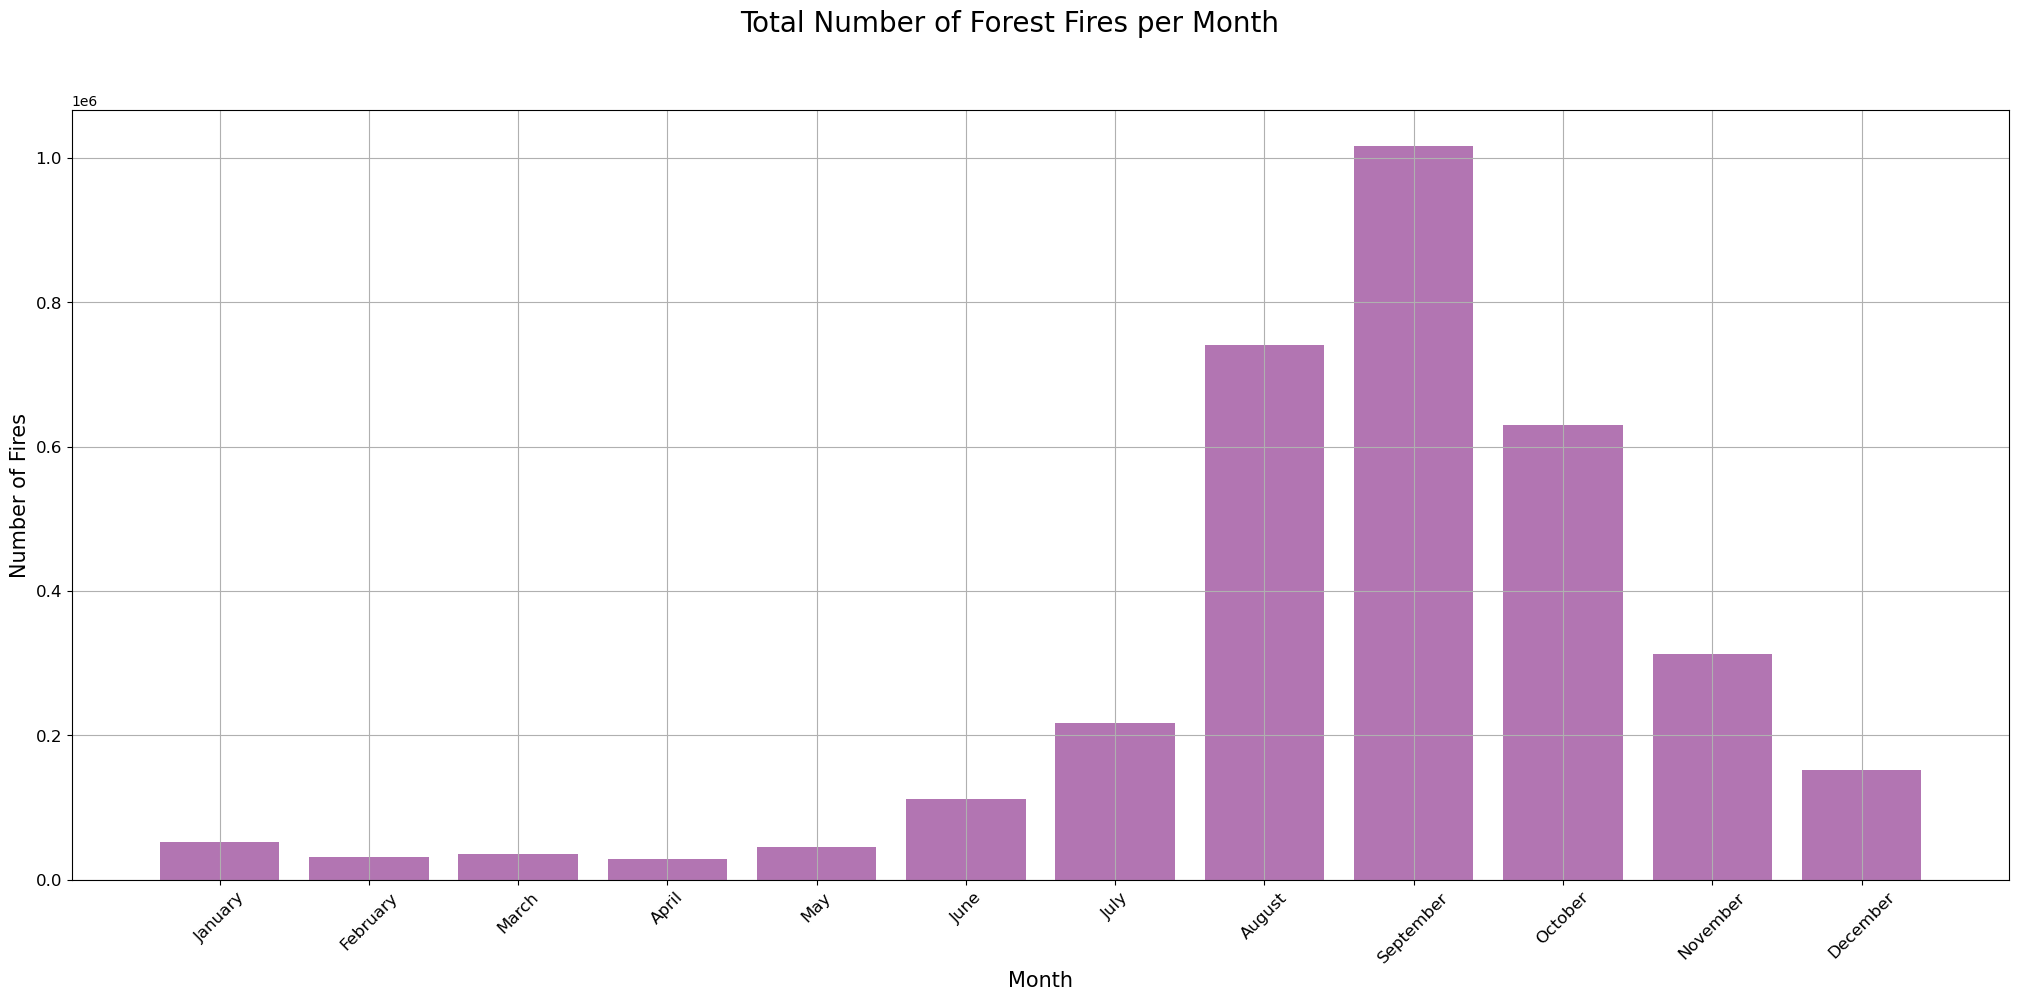

In [160]:
plt.figure(figsize=(25, 10)) 
plt.bar(fire_per_month['month'], fire_per_month['number'], color=(0.5, 0.1, 0.5, 0.6))

plt.suptitle('Total Number of Forest Fires per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Fires', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()
